## Bert的模型架构
Bert是一种基于Transformer架构的预训练语言模型。其设计旨在提高自然语言处理任务的性能，特别是理解上下文中的词义。<br>
1. Transformer架构
* 编码器（Encoder）：Bert仅使用Transformer的编码器部分。编码器由多个相同的层堆叠而成，每一层包含两个主要组件：
    * 自注意力机制：通过计算输入序列中每个单词对其他单词的注意力权重，使得模型能够捕捉到上下文信息；
    * 前馈神经网络：对自注意力的输出进行非线形变换
2. 双向上下文
Bert使用双向自注意力机制，即同时考虑左侧和右侧的上下文。
3. 预训练和微调
* 预训练
    * Masked Language Model（MLM）：让输入文本中随机遮盖一些词，然后让模型预测这些被遮盖的词。
    * Next Sentence Prediction（NSP）：给定一对句子，模型预测第二个句子是否是第一个句子的下一个句子。
* 微调（Fine-tuning）：在特定的下游任务上对预训练的Bert模型进行进一步训练。这可以通过添加一个简单的输出层来完成，例如用于分类或者序列标注任务。
4. 输入表示
* Token IDs：将输入文本转换为对应的词汇表中的索引；
* Segment IDs：用于区分不同的句子；
* Attention Mask：用于指示模型哪些词是有效的。

## Bert的变体
1. RoBERTa（稳健优化BERT方法）：RoBERTa修改了BERT中的一些关键超参数，并且去除了预训练过程中使用的“下一句预测（NSP）”目标。与BERT相比，RoBERTa使用了更大的小批量（mini-batch）、更高的学习率，并且在更多数据上进行了更长时间的训练；
2. DistilBERT：DistilBERT是由于Hugging Face开发的BERT的一个更小、更快、更便宜、更轻量的版本。它设计的目的是在保持BERT大部分性能的前提下，将模型大小减小约40%。DistilBERT通过一种称之为“蒸馏”的过程实现，这个过程涉及训练一个较小的模型来复现一个预训练的大型模型。

In [1]:
import tensorflow_hub as hub 
import tensorflow_text as text

## BERT预处理

In [2]:
preprocess_url='https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3'

In [3]:
bert_preprocess_model=hub.KerasLayer(preprocess_url)

In [4]:
test=['This is a spam mail','Computers are not unique to computers']
# 将输入文本test进行预处理，使其符合Bert模型所需要的输入格式
text_preprocessed=bert_preprocess_model(test)
# 查看预处理后的结果中包含的不同元素的键名
text_preprocessed.keys()

dict_keys(['input_mask', 'input_type_ids', 'input_word_ids'])

### 输出结果解读
1. input_mask：表示哪些词是实际文本中的，哪些是填充的
* 每个输入句子被截断或者填充为长度为128，所以掩码中前几个值为1（表示实际文本），而剩下的部分为0（表示填充的部分），因此表示前面8个词是有效词，后面的都是填充
2. input_type_ids：用于区分句子A和句子B的
* 对于单句输入，每个位置的值都为0
3. input_word_ids：表示输入文本中每个词的词汇ID
* 输入被分词为Bert的词汇表中的ID，比如第一个句子的词汇ID[101,20223,2003,12403,2213,5623,102]对应的词分别是this is a spam mail，以及特殊的CLS（101）和SEP（102）令牌，表示句子的开头和结束。

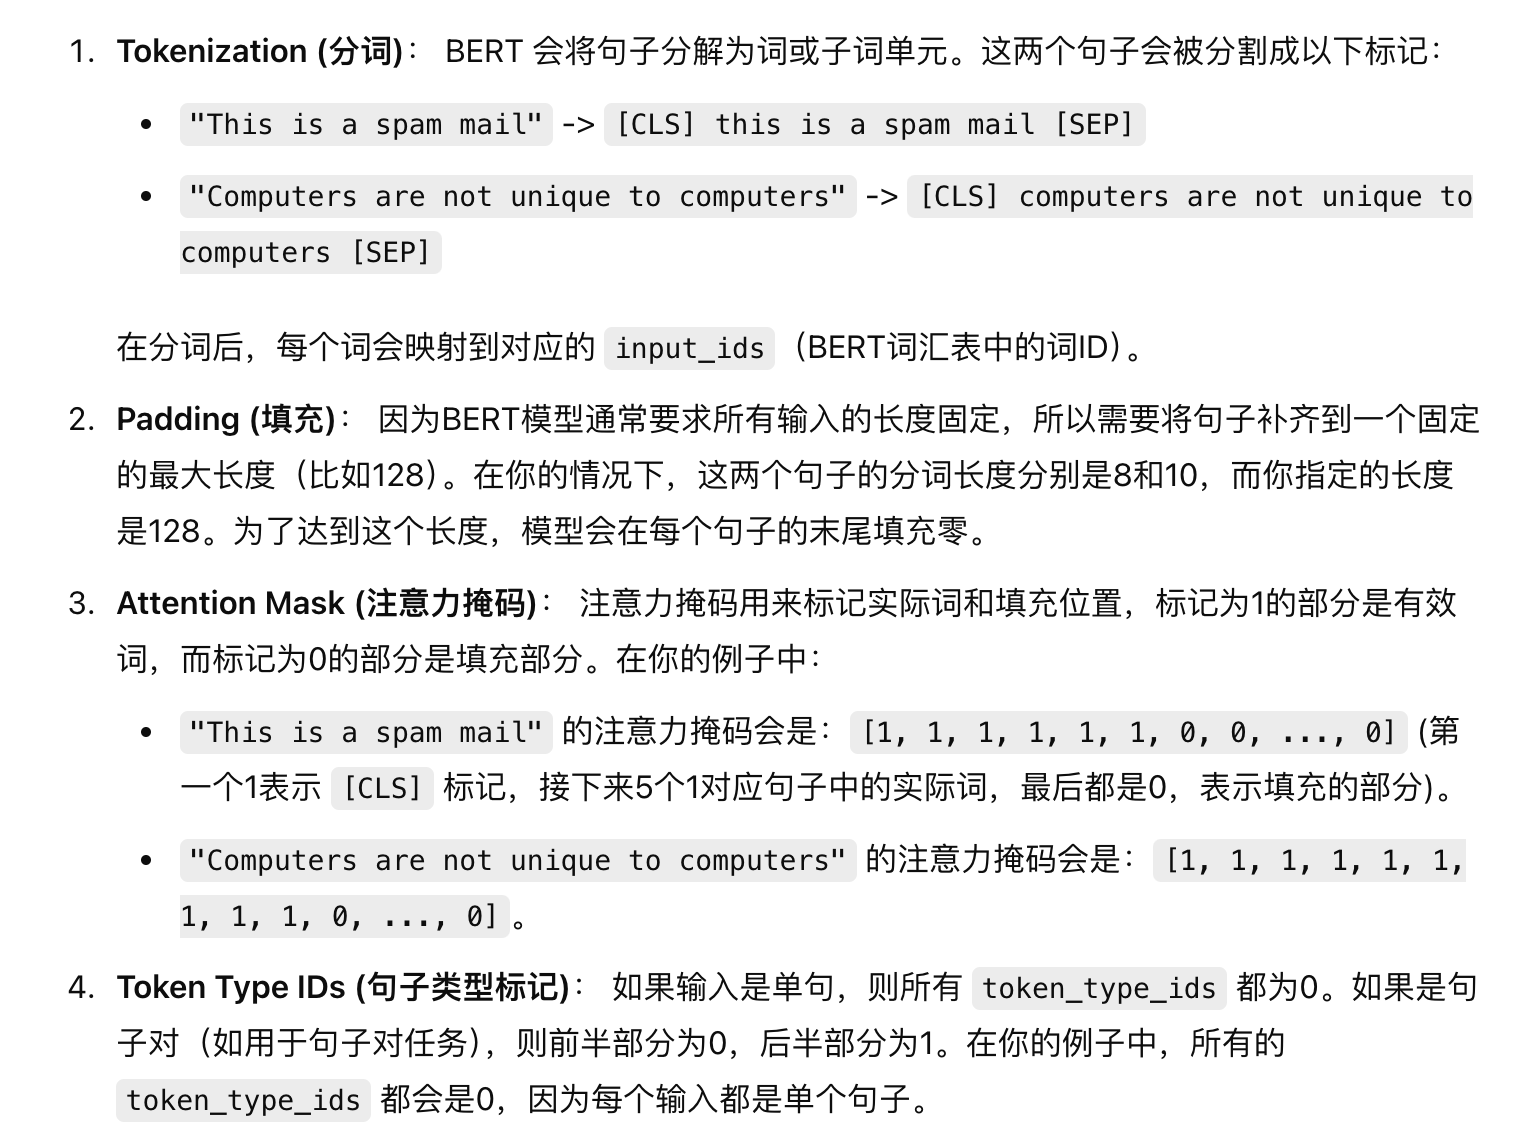

In [6]:
text_preprocessed['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [7]:
text_preprocessed['input_type_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [8]:
text_preprocessed['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  2023,  2003,  1037, 12403,  2213,  5653,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

## BERT模型

In [9]:
# 对预处理后的文本进行编码

# 这是一个预训练的BERT-base uncased模型
encoder_url='https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-l-12-h-768-a-12/4'

In [10]:
# 将预训练的模型加载到Tensorflow中
bert_model=hub.KerasLayer(encoder_url)

In [11]:
# 将预处理的文本传入Bert模型进行处理，模型会对文本编码，输出bert的结果
bert_results=bert_model(text_preprocessed)

In [12]:
bert_results.keys()

dict_keys(['default', 'sequence_output', 'encoder_outputs', 'pooled_output'])

### 输出结果解读
1. sequence_output: 每个输入词的上下文感知表示
2. encoder_outputs: 每一层编码器的输出
3. pooled_output: 句子全局表示

In [15]:
bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.02952123,  0.08941686, -0.294149  , ..., -0.28991553,
          0.33581245,  0.8754337 ],
        [-0.27376613, -0.42498812, -0.37989998, ..., -0.5700222 ,
          1.0774473 ,  0.5713814 ],
        [-0.33146405, -0.3546138 , -0.25389063, ..., -0.4263553 ,
          0.38256904,  0.9152573 ],
        ...,
        [ 0.1687568 , -0.27586895,  0.12268026, ...,  0.01988036,
          0.06036452,  0.4067648 ],
        [ 0.09589738, -0.25696537,  0.05153518, ...,  0.03342525,
          0.07288366,  0.40554115],
        [ 0.08295409, -0.22644383,  0.18546267, ...,  0.14761998,
          0.06656462,  0.36203954]],

       [[ 0.07296056,  0.516377  , -0.23151074, ..., -0.41134477,
         -0.03084355,  0.84255683],
        [-0.30089125,  0.5466941 , -0.22944902, ..., -0.26080716,
          0.23354462,  0.5297955 ],
        [ 0.6598991 ,  0.8210849 ,  0.07285064, ..., -0.40727705,
         -0.1374788 ,  0.5823899 ],
        ...,

sequence_output是bert模型处理后的输出张量，形状是(2,128,768)。
1. 2：表示输入的批次大小。我输入了两个句子"this is a spam mail"和"computers are not unique to computers"，因此批次大小为2；
2. 128: 表示每个输入序列的最大长度。在这个示例中，指定了句子的最大长度为128个词tokens，即便实际句子的长度不足128，bert也会用特殊的填充符来填充；
3. 768: 表示bert模型的隐藏层大小，即每个词的嵌入向量维度。

可以这么理解：
* 对于每一句话（共2句话），BERT 为每个位置的词输出一个 768 维的向量（即它的词向量），这些向量携带了上下文感知的语义信息。
* 例如，对于 "This is a spam mail" 这句话，BERT 输出了一个 (128, 768) 的张量，包含这句话每个词的 768 维嵌入，其中用 PAD 来填充未使用的部分。